In [296]:
import os
import numpy as np
import seaborn as sns
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [297]:
path = '../Neuro_dataset/'
path_alz = path + os.listdir(path)[0]
path_nor = path + os.listdir(path)[1]

In [298]:
files_alz = os.listdir(path_alz)
files_nor = os.listdir(path_nor)
d = loadmat(path_alz + '/' + files_alz[0])
d['tc_rest_aal'] = d['tc_rest_aal'].reshape((1, 140, 116))
d['tc_rest_power'] = d['tc_rest_power'].reshape((1, 140, 264))
X_aal = d['tc_rest_aal']
X_pow = d['tc_rest_power']

for i in range(1, len(files_alz)):
    d = loadmat(path_alz + '/' + files_alz[i])
    d['tc_rest_aal'] = d['tc_rest_aal'].reshape((1, 140, 116))
    d['tc_rest_power'] = d['tc_rest_power'].reshape((1, 140, 264))
    X_aal = np.vstack([X_aal, d['tc_rest_aal']])
    X_pow = np.vstack([X_pow, d['tc_rest_power']])

for i in range(len(files_nor)):
    d = loadmat(path_nor + '/' + files_nor[i])
    d['tc_rest_aal'] = d['tc_rest_aal'].reshape((1, 140, 116))
    d['tc_rest_power'] = d['tc_rest_power'].reshape((1, 140, 264))
    X_aal = np.vstack([X_aal, d['tc_rest_aal']])
    X_pow = np.vstack([X_pow, d['tc_rest_power']])

In [299]:
X_aal.shape

(81, 140, 116)

In [300]:
X_pow.shape

(81, 140, 264)

In [301]:
y = [1 for i in range(34)]
y.extend([0 for i in range(47)])
y = np.array(y).reshape((81, 1))
y.shape

(81, 1)

In [302]:
X_pow = X_pow.reshape(X_pow.shape[0], X_pow.shape[1]*X_pow.shape[2])
X_aal = X_aal.reshape(X_aal.shape[0], X_aal.shape[1]*X_aal.shape[2])
print(X_pow.shape, X_aal.shape)

(81, 36960) (81, 16240)


In [291]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X_pow)
X_pow = pca.fit_transform(X_pow)
pca.fit(X_aal)
X_aal = pca.fit_transform(X_aal)

In [303]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pow, y, test_size = 0.2)
print(X_train.shape, X_test.shape)

(64, 36960) (17, 36960)


In [304]:
y_train = y_train.reshape(y_train.shape[0],)
y_test = y_test.reshape(y_test.shape[0], )

In [305]:
X_train.shape

(64, 36960)

In [306]:
X_test.shape

(17, 36960)

In [307]:
from sklearn.svm import SVC

In [332]:
from sklearn.model_selection import GridSearchCV
C_range = [0.1, 1, 10, 100, 1000, 10000]
gamma_range = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
degree_range = [3]
params = {'C':C_range, 'gamma':gamma_range, 'degree':degree_range, 'kernel':['rbf']}
grid = GridSearchCV(SVC(), params, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END C=0.1, degree=3, gamma=100, kernel=rbf;, score=0.615 total time=   0.0s
[CV 2/5] END C=0.1, degree=3, gamma=100, kernel=rbf;, score=0.615 total time=   0.0s
[CV 3/5] END C=0.1, degree=3, gamma=100, kernel=rbf;, score=0.615 total time=   0.0s
[CV 4/5] END C=0.1, degree=3, gamma=100, kernel=rbf;, score=0.538 total time=   0.0s
[CV 5/5] END C=0.1, degree=3, gamma=100, kernel=rbf;, score=0.583 total time=   0.0s
[CV 1/5] END C=0.1, degree=3, gamma=10, kernel=rbf;, score=0.615 total time=   0.0s
[CV 2/5] END C=0.1, degree=3, gamma=10, kernel=rbf;, score=0.615 total time=   0.0s
[CV 3/5] END C=0.1, degree=3, gamma=10, kernel=rbf;, score=0.615 total time=   0.0s
[CV 4/5] END C=0.1, degree=3, gamma=10, kernel=rbf;, score=0.538 total time=   0.0s
[CV 5/5] END C=0.1, degree=3, gamma=10, kernel=rbf;, score=0.583 total time=   0.0s
[CV 1/5] END C=0.1, degree=3, gamma=1, kernel=rbf;, score=0.615 total time=   0.0s
[CV 2/5] E

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000], 'degree': [3],
                         'gamma': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [333]:
res = grid.cv_results_['mean_test_score']
res = res.reshape(len(C_range), len(gamma_range))
res

array([[0.59358974, 0.59358974, 0.59358974, 0.59358974, 0.59358974,
        0.59358974, 0.59358974],
       [0.59358974, 0.59358974, 0.59358974, 0.59358974, 0.59358974,
        0.59358974, 0.59358974],
       [0.59358974, 0.59358974, 0.59358974, 0.59358974, 0.59358974,
        0.59358974, 0.59358974],
       [0.59358974, 0.59358974, 0.59358974, 0.59358974, 0.59358974,
        0.59358974, 0.59358974],
       [0.59358974, 0.59358974, 0.59358974, 0.59358974, 0.59358974,
        0.59358974, 0.59358974],
       [0.59358974, 0.59358974, 0.59358974, 0.59358974, 0.59358974,
        0.59358974, 0.59358974]])

<AxesSubplot:>

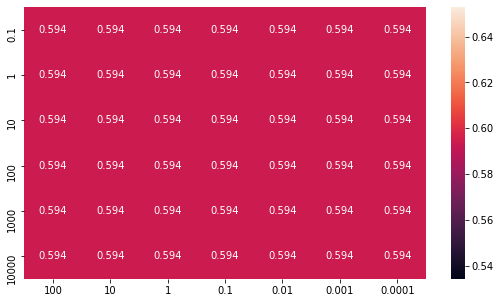

In [334]:
plt.figure(figsize=(9, 5))
sns.heatmap(res, annot=True, fmt='.3g', xticklabels=gamma_range, yticklabels=C_range)

In [335]:
grid.best_estimator_

SVC(C=0.1, gamma=100)

In [336]:
grid.best_estimator_.fit(X_train, y_train)

SVC(C=0.1, gamma=100)

In [337]:
grid.best_estimator_.score(X_train, y_train)

0.59375

In [338]:
grid.best_estimator_.score(X_test, y_test)

0.5294117647058824

In [339]:
grid.best_estimator_.n_support_

array([38, 26])